# Fundamentos de Aprendizagem de Máquina - Aquila Tech

## Problema da precificação de imóveis

## Índice

1. [Preparar os dados](#section1)<br>
    1.1 [Importar bibliotecas básicas](#section1.1)<br>
    1.2 [Criação do Dataframe](#section1.2)
2. [Explorar os dados](#section2)<br>
    2.1 ["Criação" do dicionário de dados](#section2.1)<br>
    2.2 [Descrever a variável alvo](#section2.2)<br>
    2.3 [Analisar a assimetria da variável alvo](#section2.3)<br>
    2.4 [Analisar os tipos das features](#section2.4)<br>
    2.5 [Analisar de correlação entre as variáveis](#section2.5)<br>
    2.6 [Remover de outliers](#section2.6)<br>
    2.7 [Verificar valores nulos](#section2.7)
3. [Arquitetar e transformar os dados](#section3)<br>
    3.1 [Tratar dados ausentes](#section3.1)
4. [Modelar os dados](#section4)<br>
    4.1 [Treinar o modelo](#section4.1)<br>
    4.2 [Avaliar o desempenho](#section4.2)<br>
    4.3 [Melhorar o modelo](#section4.3)

<a id="section1"><a>
### Importar bibliotecas básicas

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
import seaborn as sns
%matplotlib inline

<a id="section1.2"><a>
### Criar o Dataframe

In [2]:
houses = pd.read_csv("house_data.csv")
print(houses.shape)

(21613, 21)


<a id="section2"><a>
### Explorar os dados

In [3]:
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<a id="#section2.1"><a>
### Criação do dicionário de dados

In [4]:
list(houses)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [5]:
houses.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<a id="section2.2"><a>
### Descrever a variável alvo

In [6]:
houses.price.describe().apply(lambda x: format(x, 'f'))

count      21613.000000
mean      540088.141767
std       367127.196483
min        75000.000000
25%       321950.000000
50%       450000.000000
75%       645000.000000
max      7700000.000000
Name: price, dtype: object

<a id="section2.3"><a>
### Analisar a assimetria da variável alvo

Assimetria é: 4.024069144684712


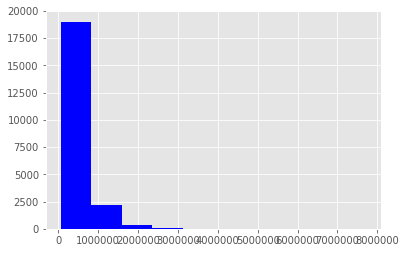

In [7]:
print ("Assimetria é:", houses.price.skew())
plt.hist(houses.price, color='blue')
plt.show()

Assimetria é: 0.42807247557592526


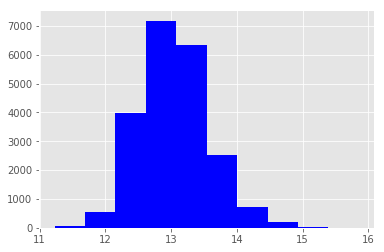

In [8]:
target = np.log(houses.price)
print ("Assimetria é:", target.skew())
plt.hist(target, color='blue')
plt.show()

<a id="section2.4"><a>
### Análise de features

In [9]:
numeric_features = houses.select_dtypes(include=[np.number])
numeric_features.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

<a id="section2.5"><a>
### Análise de correlação entre as variáveis

In [10]:
corr = numeric_features.corr()

print (corr['price'].sort_values(ascending=False)[:11], '\n')
print (corr['price'].sort_values(ascending=False)[-10:])

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
Name: price, dtype: float64 

waterfront      0.266369
floors          0.256794
yr_renovated    0.126434
sqft_lot        0.089661
sqft_lot15      0.082447
yr_built        0.054012
condition       0.036362
long            0.021626
id             -0.016762
zipcode        -0.053203
Name: price, dtype: float64


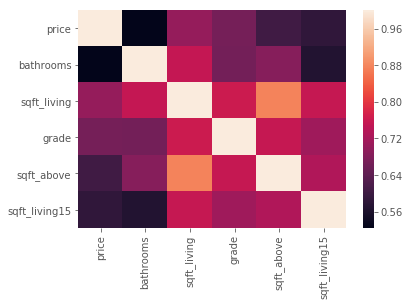

In [11]:
# matrix de correlação

data = houses.drop(['id','date','bedrooms','sqft_lot', 'floors',
                     'waterfront','view','condition','sqft_basement','yr_built',
                     'yr_renovated','zipcode','lat','long','sqft_lot15'],axis=1)
sns.heatmap(data.corr())

In [12]:
houses.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1])

In [13]:
# criamos uma tabela pivô para investigar a relação entre a variável grade e price
grade_pivot = houses.pivot_table(index='grade',
                                  values='price', aggfunc=np.median)

In [14]:
grade_pivot

,price
grade,
1,142000.0
3,262000.0
4,205000.0
5,228700.0
6,275276.5
7,375000.0
8,510000.0
9,720000.0
10,914327.0


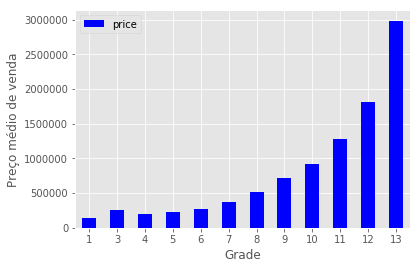

In [15]:
# visualização da tabela pivô
grade_pivot.plot(kind='bar', color='blue')
plt.xlabel('Grade')
plt.ylabel('Preço médio de venda')
plt.xticks(rotation=0)
plt.show()

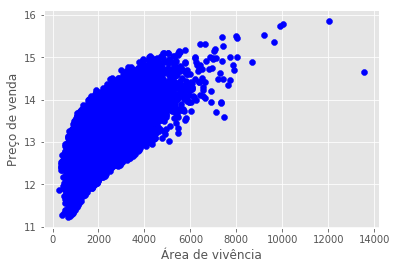

In [16]:
plt.scatter(x=houses['sqft_living'], y=target, color="blue")
plt.ylabel('Preço de venda')
plt.xlabel('Área de vivência')
plt.show()

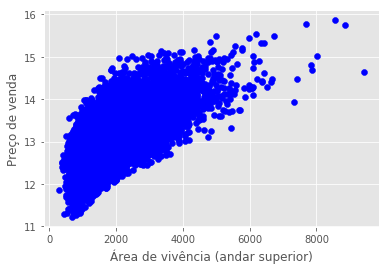

In [17]:
plt.scatter(x=houses['sqft_above'], y=target, color="blue")
plt.ylabel('Preço de venda')
plt.xlabel('Área de vivência (andar superior)')
plt.show()

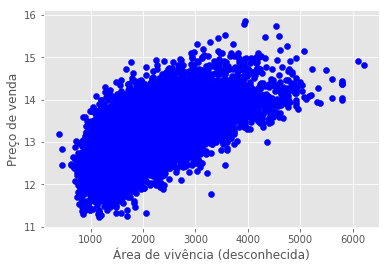

In [18]:
plt.scatter(x=houses['sqft_living15'], y=target, color="blue")
plt.ylabel('Preço de venda')
plt.xlabel('Área de vivência (desconhecida)')
plt.show()

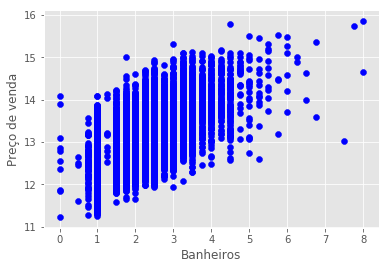

In [19]:
plt.scatter(x=houses['bathrooms'], y=target, color="blue")
plt.ylabel('Preço de venda')
plt.xlabel('Banheiros')
plt.show()

<a id="section2.6"><a>
### Remover Outliers

In [20]:
# remove outliers, se necessário

# houses = houses[houses['sqft_living'] < 11000]
# houses = houses[houses['sqft_above'] < 7000]
# houses = houses[houses['sqft_living15'] < 6000]
# houses = houses[houses['bathrooms'] < 7]

<a id="section2.7"><a>
### Verificar valores nulos

In [21]:
# verificar valores nulos
# opções: interpolar, eliminar, etc..

nulls = pd.DataFrame(houses.isnull().sum().sort_values(ascending=False)[:21])
nulls.columns = ['Total de nulos']
nulls.index.name = 'Feature'
nulls

,Total de nulos
Feature,
sqft_lot15,0
view,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0


In [22]:
categoricals = houses.select_dtypes(exclude=[np.number])
categoricals.describe()

,date
count,21613
unique,372
top,20140623T000000
freq,142


<a id="section3"><a>
### Arquitetar e transformar os dados

In [23]:
# processo de trabalhar os dados de forma adequada para uso em aprendizado de máquina e modelagem.

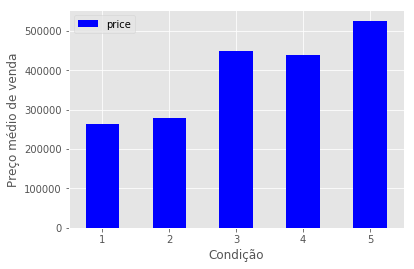

In [24]:
condition_pivot = houses.pivot_table(index='condition',
                                    values='price', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Condição')
plt.ylabel('Preço médio de venda')
plt.xticks(rotation=0)
plt.show()

In [25]:
def encode(x): return 1 if x in [3,4,5] else 0
houses['enc_condition'] = houses.condition.apply(encode)

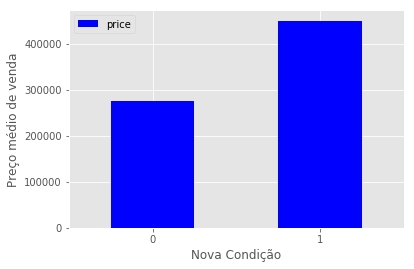

In [26]:
condition_pivot = houses.pivot_table(index='enc_condition', values='price', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Nova Condição')
plt.ylabel('Preço médio de venda')
plt.xticks(rotation=0)
plt.show()

<a id="section3.1"><a>
### Tratar dados ausentes

In [27]:
# interpolação
new_data = houses.select_dtypes(include=[np.number]).interpolate().dropna()

In [28]:
sum(data.isnull().sum() != 0)

0

<a id="section4"><a>
### Modelar os dados

In [29]:
# variáveis independentes
X = houses.drop(['id', 'price','date'],axis=1)

# variáveis dependentes
y = houses['price']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.10,random_state = 2)

# o primeiro valor de parâmetro X denota o conjunto de dados do preditor e y é a variável de destino

# X_train é o subconjunto das variáveis independentes utilizado para treinamento
# X_test é o subconjunto 'hold-out' das variáveis independentes utilizado para testar o modelo mais tarde
# y_train é a variável dependente/alvo 'price' que corresponde ao X_train
# y_test  é a variável dependente/alvo 'price' que corresponde ao X_test 

<a id="section4.1"><a>
### Treinar

In [32]:
from sklearn import linear_model

In [33]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<a id="section4.2"><a>
### Avaliar o desempenho

In [34]:
# The r-squared value is a measure of how close the data are to the fitted regression line. 
# It takes a value between 0 and 1, 1 meaning that all of the variance in the target is explained by the data.
# In general, a higher r-squared value means a better fit.

In [35]:
print ("R^2: \n", model.score(X_test, y_test))

R^2: 
 0.7323609953081791


In [36]:
predictions = model.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error
print ('RMSE: \n', mean_squared_error(y_test, predictions))

RMSE: 
 39108846405.44358


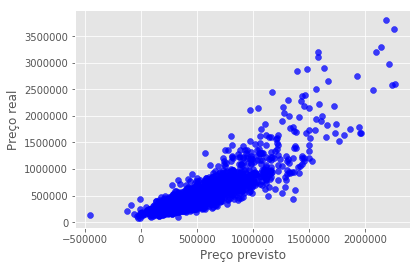

In [38]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,color='blue') #alpha helps to show overlapping data
plt.xlabel('Preço previsto')
plt.ylabel('Preço real')
# plt.title('Modelo de Regressão Linear')
plt.show()

<a id="section4.3"><a>
### Melhorar o modelo

In [39]:
# Utilizamos a ténica de Ridge Regularization para diminuir a influência de features com baixa correlação. 
# "Ridge Regularization is a process which shrinks the regression coefficients of less important features."

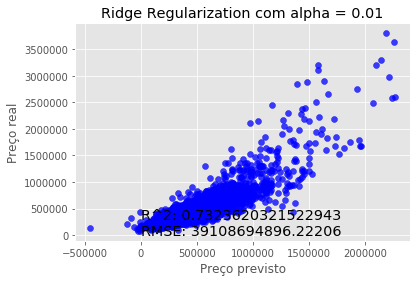

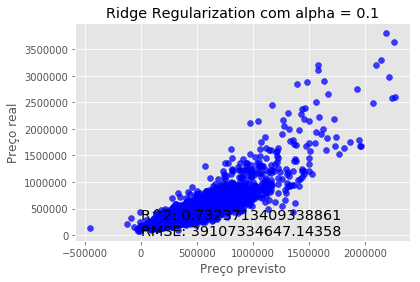

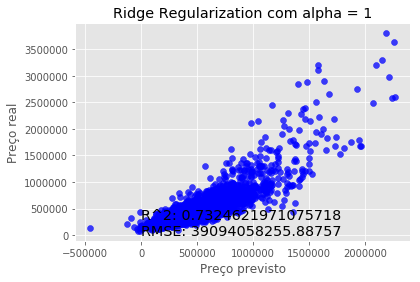

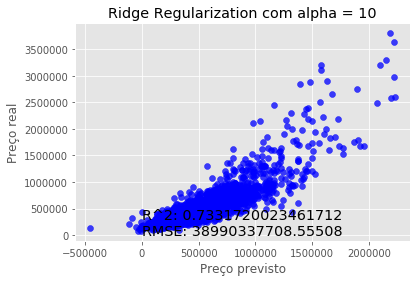

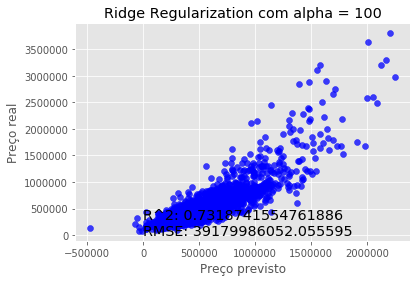

In [40]:
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)

    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Preço previsto')
    plt.ylabel('Preço real')
    plt.title('Ridge Regularization com alpha = {}'.format(alpha))
    overlay = 'R^2: {}\nRMSE: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()